In [72]:
# Load Packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import prettyplotlib as ppl
import calendar

from datetime import datetime, timedelta, date

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [73]:
personal_citibike = pd.read_csv('/Users/Snyder/Desktop/DSI-SF-Capstone-Datasets/personal-citibike-data.csv')

In [74]:
personal_citibike.head()

,starttime,stoptime,start_station_name,end_station_name,tripduration
0,7/18/13 19:34,7/18/13 19:39,E 9 St & Avenue C,E 3 St & 1 Ave,0:05:07
1,7/19/13 17:46,7/19/13 18:01,E 43 St & 2 Ave,E 3 St & 1 Ave,0:14:21
2,7/23/13 18:21,7/23/13 18:26,E 3 St & 1 Ave,E 9 St & Avenue C,0:04:58
3,7/23/13 19:46,7/23/13 19:53,E 9 St & Avenue C,E 3 St & 1 Ave,0:07:20
4,7/24/13 0:15,7/24/13 0:15,Centre St & Chambers St,Centre St & Chambers St,0:00:03


In [75]:
personal_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
starttime             318 non-null object
stoptime              318 non-null object
start_station_name    318 non-null object
end_station_name      318 non-null object
tripduration          318 non-null object
dtypes: object(5)
memory usage: 12.5+ KB


In [94]:
# Import 'citibike_stations.csv' from citibike dataset
stations = pd.read_csv('/Users/Snyder/Desktop/DSI-SF-1-SNYDER827/Projects/Capstone/citibike_stations.csv')
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 4 columns):
station_id           503 non-null int64
station_name         503 non-null object
station_latitude     503 non-null float64
station_longitude    503 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.8+ KB


In [77]:
personal_startstation = pd.read_csv('/Users/Snyder/Desktop/DSI-SF-Capstone-Datasets/personal-startstation.csv')
personal_startstation.columns

Index([u'starttime', u'start_station_name'], dtype='object')

In [78]:
personal_startstation.columns = personal_startstation.columns.map(lambda x: x.replace('start_', ''))
personal_startstation.columns

Index([u'starttime', u'station_name'], dtype='object')

In [79]:
personal_startstation = pd.merge(personal_startstation, stations, on='station_name', how='left')
personal_startstation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 317
Data columns (total 5 columns):
starttime            318 non-null object
station_name         318 non-null object
station_id           318 non-null int64
station_latitude     318 non-null float64
station_longitude    318 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.9+ KB


In [80]:
personal_startstation.columns = personal_startstation.columns.map(lambda x: x.replace('stat', 'start_stat'))

In [82]:
personal_endstation = pd.read_csv('/Users/Snyder/Desktop/DSI-SF-Capstone-Datasets/personal-endstation.csv')
#personal_endstation.columns
personal_endstation.columns = personal_endstation.columns.map(lambda x: x.replace('end_', ''))
#personal_endstation.columns
personal_endstation = pd.merge(personal_endstation, stations, on='station_name', how='left')

In [83]:
personal_endstation.columns = personal_endstation.columns.map(lambda x: x.replace('stat', 'end_stat'))
personal_endstation

,starttime,stoptime,end_station_name,tripduration,end_station_id,end_station_latitude,end_station_longitude
0,7/18/13 19:34,7/18/13 19:39,E 3 St & 1 Ave,0:05:07,428.0,40.724677,-73.987834
1,7/19/13 17:46,7/19/13 18:01,E 3 St & 1 Ave,0:14:21,428.0,40.724677,-73.987834
2,7/23/13 18:21,7/23/13 18:26,E 9 St & Avenue C,0:04:58,394.0,40.725213,-73.977688
3,7/23/13 19:46,7/23/13 19:53,E 3 St & 1 Ave,0:07:20,428.0,40.724677,-73.987834
4,7/24/13 0:15,7/24/13 0:15,Centre St & Chambers St,0:00:03,387.0,40.712733,-74.004607
5,7/24/13 19:48,7/24/13 20:02,Cliff St & Fulton St,0:13:31,306.0,40.708235,-74.005301
6,7/24/13 23:15,7/24/13 23:29,E 2 St & 2 Ave,0:14:03,403.0,40.725029,-73.990697
7,7/26/13 13:40,7/26/13 13:50,E 45 St & 3 Ave,0:09:44,440.0,40.752554,-73.972826
8,7/26/13 17:24,7/26/13 17:32,Broadway & W 36 St,0:07:12,267.0,40.750977,-73.987654
9,7/26/13 21:37,7/26/13 21:39,St Marks Pl & 1 Ave,0:02:28,438.0,40.727791,-73.985649


In [100]:
# personal_citibike = pd.merge(personal_startstation, personal_endstation, on='starttime', how='left')
# personal_citibike

In [97]:
personal_citibike.to_csv('personal_citibike.csv', index = False)

In [99]:
personal_citibike = pd.read_csv('/Users/Snyder/Desktop/DSI-SF-1-SNYDER827/Projects/Capstone/personal_citibike.csv')
personal_citibike

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
0,0:05:07,2013-07-18 19:34:00,2013-07-18 19:39:00,394,E 9 St & Avenue C,40.725213,-73.977688,428,E 3 St & 1 Ave,40.724677,-73.987834
1,0:14:21,2013-07-19 17:46:00,2013-07-19 18:01:00,2017,E 43 St & 2 Ave,40.750224,-73.971214,428,E 3 St & 1 Ave,40.724677,-73.987834
2,0:04:58,2013-07-23 18:21:00,2013-07-23 18:26:00,428,E 3 St & 1 Ave,40.724677,-73.987834,394,E 9 St & Avenue C,40.725213,-73.977688
3,0:07:20,2013-07-23 19:46:00,2013-07-23 19:53:00,394,E 9 St & Avenue C,40.725213,-73.977688,428,E 3 St & 1 Ave,40.724677,-73.987834
4,0:13:31,2013-07-24 19:48:00,2013-07-24 20:02:00,312,Allen St & Stanton St,40.722055,-73.989111,306,Cliff St & Fulton St,40.708235,-74.005301
5,0:14:03,2013-07-24 23:15:00,2013-07-24 23:29:00,224,Spruce St & Nassau St,40.711464,-74.005524,403,E 2 St & 2 Ave,40.725029,-73.990697
6,0:09:44,2013-07-26 13:40:00,2013-07-26 13:50:00,493,W 45 St & 6 Ave,40.756800,-73.982912,440,E 45 St & 3 Ave,40.752554,-73.972826
7,0:07:12,2013-07-26 17:24:00,2013-07-26 17:32:00,422,W 59 St & 10 Ave,40.770513,-73.988038,267,Broadway & W 36 St,40.750977,-73.987654
8,0:02:28,2013-07-26 21:37:00,2013-07-26 21:39:00,259,South St & Whitehall St,40.701221,-74.012342,438,St Marks Pl & 1 Ave,40.727791,-73.985649
9,0:04:35,2013-07-27 11:19:00,2013-07-27 11:24:00,428,E 3 St & 1 Ave,40.724677,-73.987834,394,E 9 St & Avenue C,40.725213,-73.977688


In [103]:
# Convert start/stop time columns to datetiume

personal_citibike.starttime = pd.to_datetime(personal_citibike.starttime)
personal_citibike.stoptime = pd.to_datetime(personal_citibike.stoptime)

In [104]:
personal_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 11 columns):
tripduration               333 non-null object
starttime                  333 non-null datetime64[ns]
stoptime                   333 non-null datetime64[ns]
start_station_id           333 non-null int64
start_station_name         333 non-null object
start_station_latitude     333 non-null float64
start_station_longitude    333 non-null float64
end_station_id             333 non-null int64
end_station_name           333 non-null object
end_station_latitude       333 non-null float64
end_station_longitude      333 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [108]:
personal_citibike['starthour'] = personal_citibike['starttime'].hour

AttributeError: 'Series' object has no attribute 'hour'

In [109]:
personal_citibike.starttime.dtype

dtype('<M8[ns]')

In [110]:
def hr_func(ts):
    return ts.hour

personal_citibike['start_hour'] = personal_citibike['starttime'].apply(hr_func)

In [112]:
personal_citibike.start_hour.value_counts()

17    36
19    31
18    31
16    28
14    28
11    27
13    26
15    25
12    24
21    17
20    17
10    16
23     8
22     6
9      4
7      3
0      2
5      1
4      1
2      1
1      1
Name: start_hour, dtype: int64

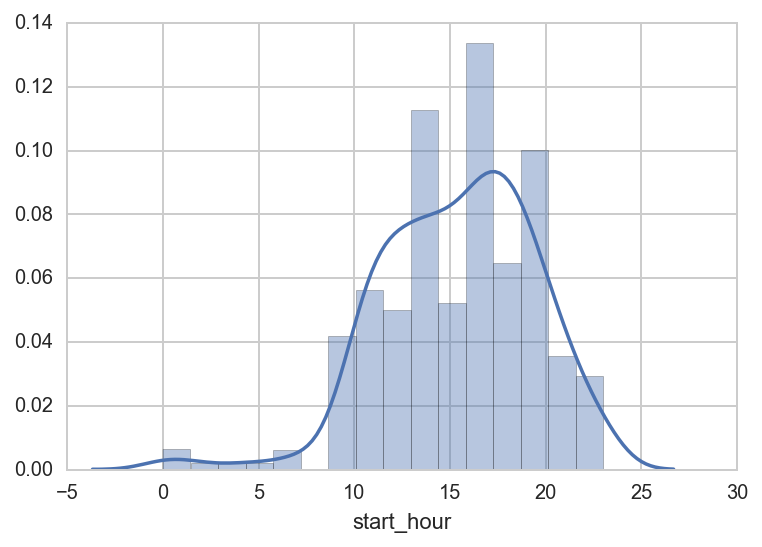

In [113]:
# Histogram of start_hour

x = personal_citibike.start_hour

sns.distplot(x)

In [114]:
personal_citibike[personal_citibike['start_hour'] <= 6]

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,start_hour
87,0:09:05,2013-10-21 00:18:00,2013-10-21 00:27:00,394,E 9 St & Avenue C,40.725213,-73.977688,361,Allen St & Hester St,40.716059,-73.991908,0
137,0:03:49,2014-02-01 00:25:00,2014-02-01 00:29:00,312,Allen St & Stanton St,40.722055,-73.989111,361,Allen St & Hester St,40.716059,-73.991908,0
144,0:02:45,2014-03-05 05:52:00,2014-03-05 05:55:00,432,E 7 St & Avenue A,40.726218,-73.983799,394,E 9 St & Avenue C,40.725213,-73.977688,5
173,0:06:20,2014-06-21 02:36:00,2014-06-21 02:43:00,432,E 7 St & Avenue A,40.726218,-73.983799,361,Allen St & Hester St,40.716059,-73.991908,2
206,0:04:20,2014-07-13 01:52:00,2014-07-13 01:56:00,312,Allen St & Stanton St,40.722055,-73.989111,361,Allen St & Hester St,40.716059,-73.991908,1
263,0:02:32,2014-08-23 04:24:00,2014-08-23 04:26:00,296,Division St & Bowery,40.714131,-73.997047,361,Allen St & Hester St,40.716059,-73.991908,4


In [115]:
personal_citibike.start_station_name.value_counts()

Forsyth St & Broome St           63
Allen St & Hester St             56
Allen St & Stanton St            18
E 9 St & Avenue C                18
E 3 St & 1 Ave                   14
St Marks Pl & 2 Ave              11
Forsyth St & Canal St             8
E 7 St & Avenue A                 5
E 4 St & 2 Ave                    5
Vesey Pl & River Terrace          5
Elizabeth St & Hester St          5
Lafayette St & E 8 St             5
Allen St & Rivington St           4
Old Slip & Front St               4
Stanton St & Chrystie St          4
Fulton St & Washington Ave        4
Lafayette St & Jersey St          4
Cleveland Pl & Spring St          4
E 2 St & 2 Ave                    3
6 Ave & Broome St                 3
Broadway & W 24 St                3
Broadway & E 14 St                3
Rivington St & Chrystie St        3
9 Ave & W 22 St                   3
Mercer St & Spring St             3
Mott St & Prince St               3
Lawrence St & Willoughby St       3
Pershing Square North       

In [116]:
personal_citibike.end_station_name.value_counts()

Forsyth St & Broome St               59
E 9 St & Avenue C                    30
Allen St & Hester St                 22
Shevchenko Pl & E 7 St               16
Cliff St & Fulton St                 13
Mott St & Prince St                  10
E 3 St & 1 Ave                       10
6 Ave & Broome St                     9
Allen St & Stanton St                 8
Cleveland Pl & Spring St              7
Lafayette St & Jersey St              6
E 7 St & Avenue A                     6
Carmine St & 6 Ave                    5
E 2 St & 2 Ave                        5
Lafayette St & E 8 St                 5
Fulton St & Washington Ave            4
E 10 St & Avenue A                    4
West Thames St                        4
Forsyth St & Canal St                 4
E 19 St & 3 Ave                       4
Vesey Pl & River Terrace              4
W 17 St & 8 Ave                       4
South St & Gouverneur Ln              3
St Marks Pl & 2 Ave                   3
E 13 St & Avenue A                    3
